# 02 - Exploratory Data Analysis and Visualization

This notebook includes:
- Descriptive statistics
- Correlation analysis
- Group comparisons
- Hypothesis testing
- Data visualization (histograms, boxplots, scatter plots, heatmaps)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv(r"../data/processed/student_data_prepared.csv")

In [75]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


---

## 🎯 Target Variable Analysis (Final Grades)

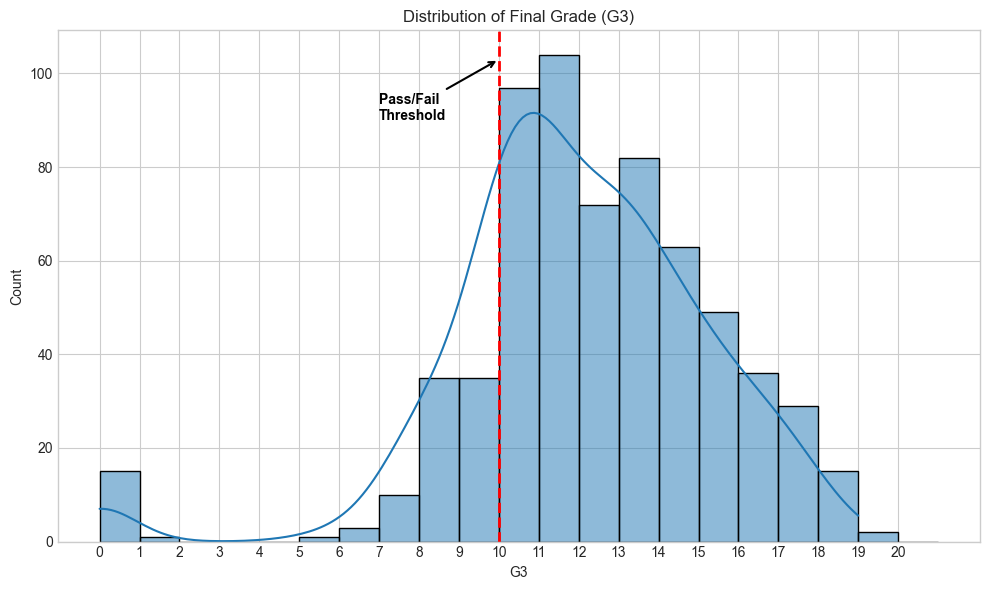

In [76]:
plt.figure(figsize=(10, 6))
blue = "#0096c7"
sns.histplot(data=df, x="G3", bins=range(0, 22), kde=True, edgecolor="black")
plt.xticks(range(0, 21))
plt.axvline(x=10, color="red", linestyle="--", linewidth=2)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(10, 103),
    xytext=(7, 90),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### What it shows:

- **Central tendency**: G3 scores cluster around 10-13, indicating most students achieve average performance in the Portuguese grading system.
- **Pass/Fail threshold**: The red dashed line at 10 clearly separates passing students (majority) from failing students (smaller left tail).
- **Distribution shape**: Mild left skew shows more students achieve average-to-good grades, with fewer exceptional performers at the high end (17-19).
- **At-risk identification**: Low-end outliers (0-5 range) represent students who may have dropped out or faced severe academic challenges during the year.

---

## 🎓 School-Related Factors Analysis

In [ ]:
correlations = (
    df.select_dtypes(include=[np.number])
    .corr()["G3"]
    .abs()
    .sort_values(ascending=False)
)
print(correlations.head(15))  # Top 10 correlations with G3

G3            1.000000
G2            0.918548
G1            0.826387
pass_fail     0.663157
failures      0.393316
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
traveltime    0.127173
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
Name: G3, dtype: float64


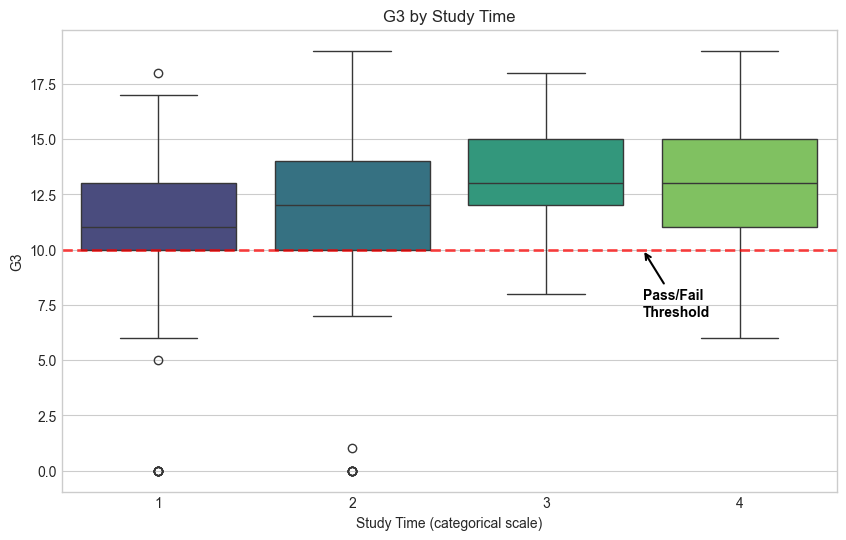

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="studytime", y="G3", data=df, palette="viridis")
plt.axhline(y=10, color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(2.5, 10),
    xytext=(2.5, 7),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("G3 by Study Time")
plt.xlabel("Study Time (categorical scale)")
plt.ylabel("G3")
plt.show()

### What it shows:

- **Progressive improvement**: Median G3 scores increase consistently across study time categories (1→2→3→4), demonstrating a clear positive relationship.
- **Reduced variability**: Higher study time categories show tighter interquartile ranges, suggesting more consistent academic outcomes among dedicated studiers.
- **Study time 1 vs 4 contrast**: Students in category 1 (<2 hours) show wider grade distribution with lower medians, while category 4 (>10 hours) students cluster around higher performance levels.
- **Outlier patterns**: Categories 1 and 2 show outliers (both high and low performers), while categories 3 and 4 have no outliers, indicating that higher study time leads to more predictable, consistently good performance.

---

## 🤝 Support Systems Analysis

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="famsup", y="G3", data=df, palette="viridis")
plt.axhline(y=10, color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(0.5, 10),
    xytext=(0.5, 7),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("G3 by Family Support")
plt.xlabel("Family Support (categorical scale)")
plt.ylabel("G3")
plt.show()

### What it shows:

- **Minimal performance difference**: Students with and without family support show very similar median G3 scores, suggesting family support alone doesn't dramatically impact final grades.
- **Consistent distributions**: Both groups display similar interquartile ranges and overall grade distributions, indicating family support may not be the primary differentiator in academic outcomes.
- **Threshold performance**: Both groups have median scores well above the pass/fail threshold (10), with most students in both categories achieving passing grades.
- **Other factors matter more**: The similarity suggests that factors like study time, attendance, and past failures may be stronger predictors than family educational support alone.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="schoolsup", y="G3", data=df, palette="viridis")
plt.axhline(y=10, color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(0.5, 10),
    xytext=(0.5, 6.2),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("G3 by School Support")
plt.xlabel("School Support")
plt.ylabel("G3")
plt.show()

### What it shows:

- **Counterintuitive pattern**: Students receiving school support actually show lower median G3 scores compared to those without support, suggesting support is provided to struggling students.
- **Intervention targeting**: The lower performance in the supported group indicates schools are correctly identifying at-risk students, but this creates a selection bias in the data.
- **Support effectiveness unclear**: Without longitudinal data, we cannot determine if school support improves outcomes - the current data reflects students' status when support was already being provided.
- **Policy implications**: This highlights the importance of early identification and preventive support rather than reactive intervention after students are already struggling.

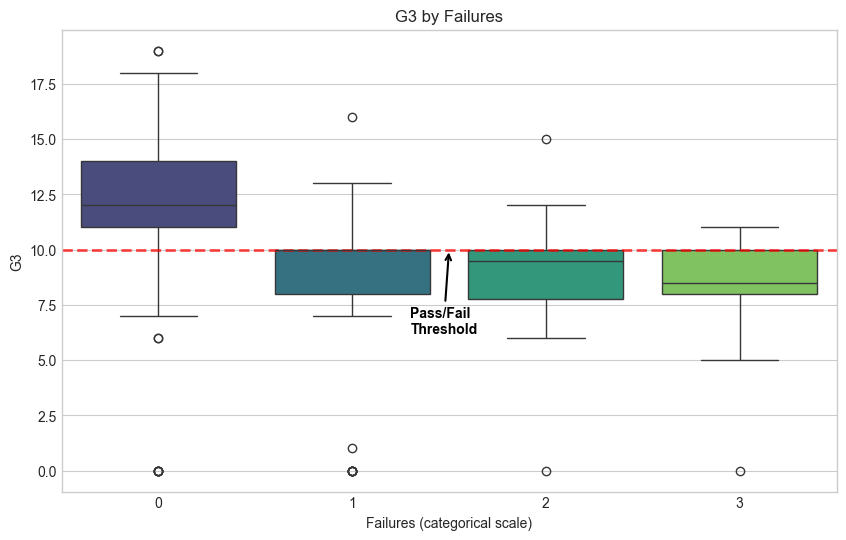

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="failures", y="G3", data=df, palette="viridis")
plt.axhline(y=10, color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(1.5, 10),
    xytext=(1.3, 6.2),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("G3 by Failures")
plt.xlabel("Failures (categorical scale)")
plt.ylabel("G3")
plt.show()

### What it shows:

- **Sharp performance decline**: Students with 0 failures show consistently high G3 scores (median ~13), while those with 1+ failures show dramatically lower performance.
- **Compounding effect**: Each additional failure corresponds to progressively worse outcomes, with students having 2+ failures showing medians near or below the pass/fail threshold.
- **High-risk identification**: Students with 3+ past failures represent an extremely high-risk group with very low G3 scores, requiring immediate intervention.
- **Early intervention critical**: The steep decline between 0 and 1 failure emphasizes the importance of preventing the first failure, as recovery becomes increasingly difficult with each subsequent failure.

---

## 🧑‍🤝‍🧑 Social & Personal Factors Analysis

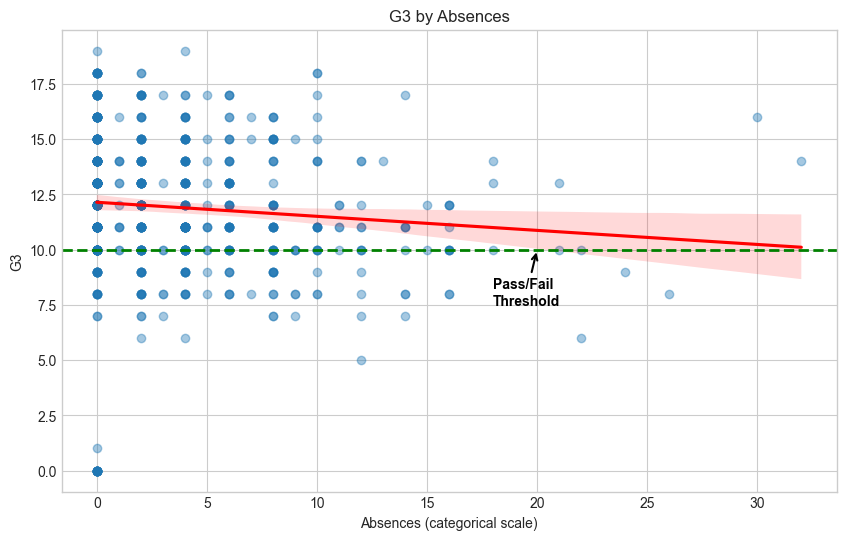

In [80]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="absences", y="G3", data=df, scatter_kws={"alpha": 0.4}, line_kws={"color": "red"}
)
plt.axhline(y=10, color="green", linestyle="--", linewidth=2)
plt.annotate(
    "Pass/Fail\nThreshold",
    xy=(20, 10),
    xytext=(18, 7.5),
    color="Black",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
)
plt.title("G3 by Absences")
plt.xlabel("Absences (categorical scale)")
plt.ylabel("G3")
plt.show()

### What it shows:

- **Clear negative correlation**: As absences increase, final grades (G3) tend to decrease significantly.
- **Strong attendance-performance link**: Students with 0-5 absences cluster around 12-18 grades, while high-absence students (20+ absences) show much lower performance.
- **Red trend line** confirms the downward trajectory, suggesting attendance is a strong predictor of academic success.
- **Few extreme cases**: Students with 25+ absences represent at-risk populations with consistently poor outcomes.

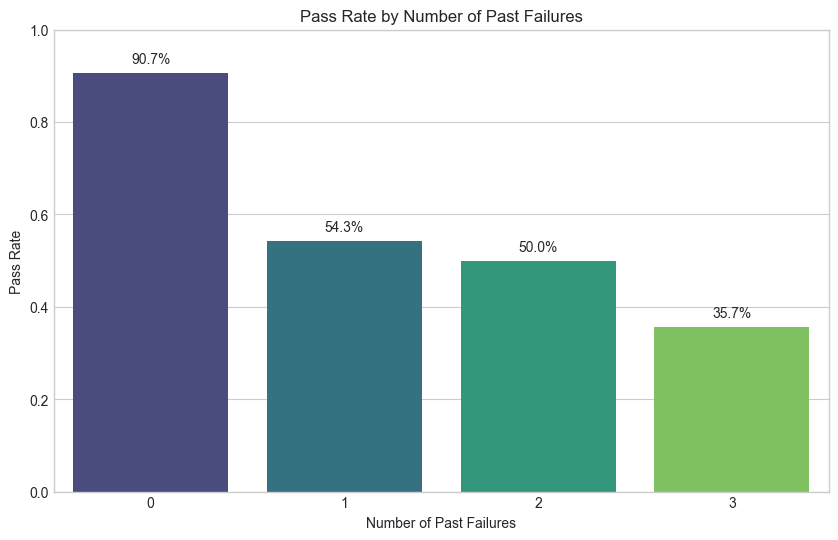

In [81]:
plt.figure(figsize=(10, 6))
pass_rate = df.groupby("failures")["pass_fail"].mean()
sns.barplot(x=pass_rate.index, y=pass_rate.values, palette="viridis")
plt.title("Pass Rate by Number of Past Failures")
plt.xlabel("Number of Past Failures")
plt.ylabel("Pass Rate")
plt.ylim(0, 1)
# Add percentage labels on bars
for i, v in enumerate(pass_rate.values):
    plt.text(i, v + 0.02, f"{v:.1%}", ha="center")
plt.show()

### What it shows:

- **Dramatic decline in success**: Pass rates drop sharply from students with 0 failures to those with multiple past failures, showing the compounding effect of academic struggles.
- **Strong predictive pattern**: Past academic failure is a powerful predictor of future performance, with each additional failure significantly reducing the likelihood of passing.
- **At-risk identification**: Students with 2+ past failures show critically low pass rates, making them high-priority candidates for intervention programs.
- **Prevention importance**: The steep decline emphasizes the critical importance of early intervention to prevent the first failure, as recovery becomes increasingly difficult with each subsequent failure.

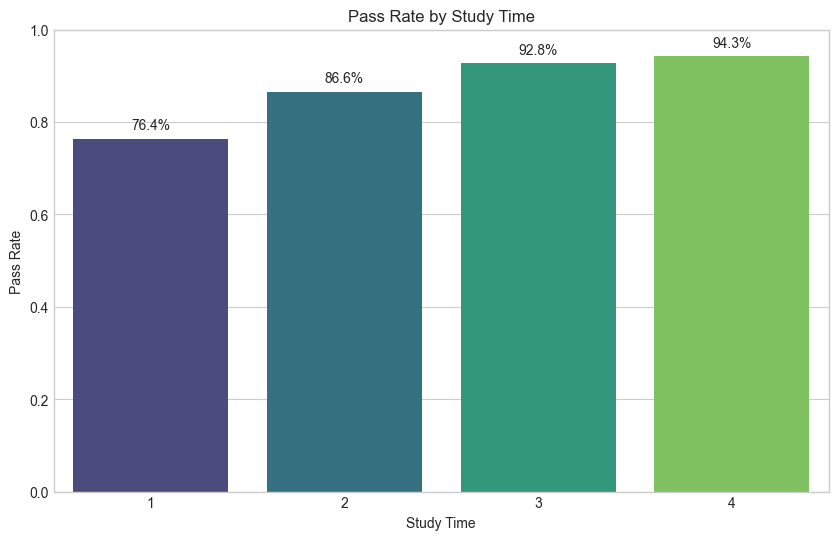

In [92]:
plt.figure(figsize=(10, 6))
pass_rate = df.groupby("studytime")["pass_fail"].mean()
sns.barplot(x=pass_rate.index, y=pass_rate.values, palette="viridis")
plt.title("Pass Rate by Study Time")
plt.xlabel("Study Time")
plt.ylabel("Pass Rate")
plt.ylim(0, 1)
# Add percentage labels on bars
for i, v in enumerate(pass_rate.values):
    plt.text(i, v + 0.02, f"{v:.1%}", ha="center")
plt.show()

### What it shows:

- **Strong positive correlation**: Pass rates increase dramatically with study time, from ~77% for minimal study (category 1) to nearly 95% for intensive study (category 4).
- **Diminishing returns**: The largest improvement occurs between categories 1 and 2, with more modest gains at higher study levels, suggesting a threshold effect.
- **Study time as intervention**: The clear relationship demonstrates that encouraging increased study time could be an effective strategy for improving student outcomes, particularly for those currently studying <2 hours per week.